# Univariative Analysis (Analysis of  Single Variable)

**Import Dataset. and merge two dataframe.

In [11]:
df1 = pd.read_csv('athlete_events.csv')
df2 = pd.read_csv('noc_regions.csv')

In [12]:
df = pd.merge(df1,df2, on = 'NOC', how = 'left')

In [13]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [14]:
df.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


**Checking info of dataframe.

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271116 entries, 0 to 271115
Data columns (total 17 columns):
ID        271116 non-null int64
Name      271116 non-null object
Sex       271116 non-null object
Age       261642 non-null float64
Height    210945 non-null float64
Weight    208241 non-null float64
Team      271116 non-null object
NOC       271116 non-null object
Games     271116 non-null object
Year      271116 non-null int64
Season    271116 non-null object
City      271116 non-null object
Sport     271116 non-null object
Event     271116 non-null object
Medal     39783 non-null object
region    270746 non-null object
notes     5039 non-null object
dtypes: float64(3), int64(2), object(12)
memory usage: 37.2+ MB


** Checking null columns.

In [16]:
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
region       370
notes     266077
dtype: int64

### EDA.

**Plotting Age column, actually we could fill the missing column but for simple analysis drop null column instead.

In [73]:
from scipy.stats import skew
age_df = pd.to_numeric(df['Age'], errors='coerce')
age_df = age_df.dropna()
w_df = pd.to_numeric(df['Weight'], errors='coerce')
w_df = w_df.dropna()
h_df = pd.to_numeric(df['Height'], errors='coerce')
h_df = h_df.dropna()
print(f'Skweness of Age : {skew(age_df)} Weight : {skew(w_df)} Height : {skew(h_df)}')

Skweness of Age : 1.7471125214748489 Weight : 0.797163284853019 Height : 0.018477166844560602


### Plotting all Columns distribution

<AxesSubplot:xlabel='Age'>

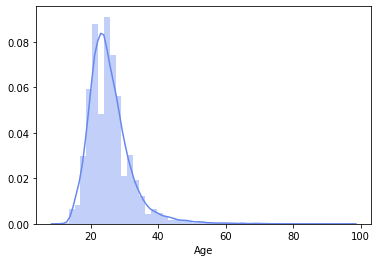

In [76]:
sns.distplot(df['Age'])

<AxesSubplot:xlabel='Weight'>

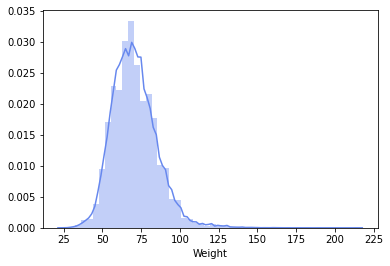

In [75]:
sns.distplot(df['Weight'])

<AxesSubplot:xlabel='Height'>

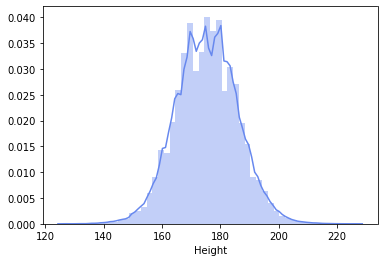

In [77]:
sns.distplot(df['Height'])

### Analysis of Medalist Athlete.

In [81]:
medalist_df = df.loc[df['Medal'].notnull()]

**Grouping as Athlete with medals only.

In [82]:
medalist_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
37,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze,Finland,NaN
38,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze,Finland,NaN
40,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze,Finland,NaN
41,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze,Finland,NaN


**Athlete medal analysis by region.

In [86]:
df['Medal'].value_counts()

Gold      13372
Bronze    13295
Silver    13116
Name: Medal, dtype: int64

<AxesSubplot:xlabel='Medal', ylabel='count'>

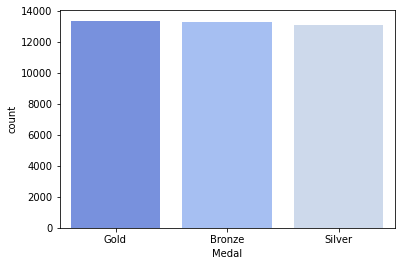

In [120]:
sns.countplot(x=df['Medal'])

### Top 5 List Gold Medalist by its region.

In [108]:
df.loc[df['Medal'] == 'Gold','region'].value_counts().nlargest(5)

USA        2638
Russia     1599
Germany    1301
UK          678
Italy       575
Name: region, dtype: int64

<AxesSubplot:ylabel='region'>

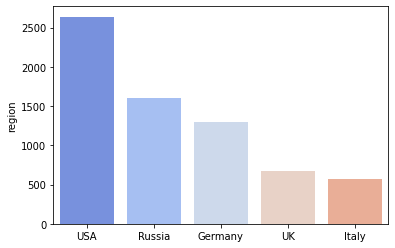

In [117]:
sns.barplot(y=df.loc[df['Medal'] == 'Gold','region'].value_counts().nlargest(5),x=df.loc[df['Medal'] == 'Gold','region'].value_counts().nlargest(5).index)

### Top 5 Sport in Dataset.

In [126]:
df['Sport'].value_counts().nlargest(5)

Athletics     38624
Gymnastics    26707
Swimming      23195
Shooting      11448
Cycling       10859
Name: Sport, dtype: int64

<AxesSubplot:ylabel='Sport'>

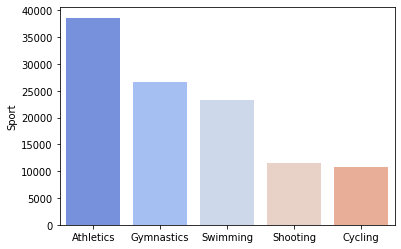

In [127]:
sns.barplot(y=df['Sport'].value_counts().nlargest(5), x=df['Sport'].value_counts().nlargest(5).index)